<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/FIRE_Convective_Cores_Ritvik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FIRE 298 Final Report 
##Investigating Convective Cores in Time and Space
###Alex Friedman, Eric Schneider, Ritvik Singh, Rohan Panickar
###December 7, 2020


#Introduction
Convective Cores are essential for creating convective heat and moisture transport. Analyzing how convective cores travel can lead to better forecasting since scientists would be able to predict where storms would lead to. Data contained in convective cores such as their sizes and depths can be analyzed in order to create more accurate weather models. 3D clustering with kmeans clustering of convective cores in time and space have been documented previous projects such as in a cloud system study (Stubenrauch). The implications of investigating convective cores with machine learning are endless. Perhaps in later studies, scientists could use models -- similarly to how we implemented our project -- to forecast supercells and other formations weeks before they truly form.

Our project aimed to answer the following question about convective cores: is there a fundamental temporal and/or spacial scale for convective updraft cores?
The team used an unsupervised machine learning approach and clustering to learn more about how convective cores move across time and space. Then we used a gaussian mixture model to cluster the data from the cores and classified the clusters to their respective cores. 

While there have been studies done that classify convective cores into the types of storms that are produced with machine learning (Jergensen), our project began using machine learning in order to classify convective cores according to their windspeeds. 


#Dependencies


In [ ]:
!pip install -q  netCDF4
!pip install sklearn
from netCDF4 import Dataset #Used to import the dataset
from google.colab import drive
import numpy as np #Used to store the dataset
import matplotlib.pyplot as plt #Used to plot the graphs
from scipy.cluster.vq import kmeans,vq
from sklearn.cluster import KMeans
from pylab import plot,show
from sklearn.mixture import GaussianMixture
drive.mount('/content/gdrive')

#Data
The dataset we used was from NASA and provides a snapshot of a large assortment of convective cores at 12 different time intervals. The variables we used from the dataset were the Vertical Air Velocity (m/s) and the horizontal distance in the X/Y axis (km).

For the second objective we filtered the data to only have vertical air velocities of 3m/s or greater.

#Methods

##Reading in Files

This is a helper method we created to open the file and read it in. The method takes in the filename and returns the open file.

In [ ]:
def get_file(file):
  #list directory and file name
  DIRECTORY = "/content/gdrive/Shared drives/FIRE-CC/convective cores/test_data/" # path to the data directory
  FILE= file #name of one of the files, each file is a different snapshot in a time series
  #open as dataset
  file_path=DIRECTORY+FILE #concatenate the data directory and file name to make a complete path to the file
  fid = Dataset(file_path) #open the file for importing
  return fid
#Uploading the NASA data det into the collab notebook.

Reading in the 12 data sets we have for the vertical wind velocity so that we can define the variables and display them graphically.

In [ ]:
cdf1 = get_file("w_case_0_252.cdf")
cdf2 = get_file("w_case_0_253.cdf")
cdf3 = get_file("w_case_0_254.cdf")
cdf4 = get_file("w_case_0_255.cdf")
cdf5 = get_file("w_case_0_256.cdf")
cdf6 = get_file("w_case_0_257.cdf")
cdf7 = get_file("w_case_0_258.cdf")
cdf8 = get_file("w_case_0_259.cdf")
cdf9 = get_file("w_case_0_260.cdf")
cdf10 = get_file("w_case_0_261.cdf")
cdf11= get_file("w_case_0_262.cdf")
cdf12 = get_file("w_case_0_263.cdf")
#Importing each direct file and seperating the data. This allows for each specfic time set to be analyzed seperately.

In [ ]:
cdf1.variables

{'height': <class 'netCDF4._netCDF4.Variable'>
 float32 height(z)
     variable: height from the surface
     unit: km
 unlimited dimensions: 
 current shape = (43,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'w': <class 'netCDF4._netCDF4.Variable'>
 float32 w(z, y, x)
     variable: vertical air velocity
     unit: m/s
 unlimited dimensions: 
 current shape = (43, 256, 256)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'xdir': <class 'netCDF4._netCDF4.Variable'>
 float32 xdir(x)
     variable: horizontal distance in x axis
     unit: km
 unlimited dimensions: 
 current shape = (256,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'ydir': <class 'netCDF4._netCDF4.Variable'>
 float32 ydir(y)
     variable: horizontal distance in y axis
     unit: km
 unlimited dimensions: 
 current shape = (256,)
 filling on, default _FillValue of 9.969209968386869e+36 used}

These are two more helper methods we created to get the vertical wind velocity and to get the distance along the horizontal x direction.

In [ ]:
def get_w(file):
  w=file.variables['w'][:] # this is the vertical wind velocity it has 3 dimensions. The leftmost dimension is height (z), the rightmost dimension is horizontal in the x direction. The units are meters per second.
  return w

def get_x(file):
  xdir=file.variables['xdir'][:] # this is the distance along the horizontal x direction it has 1 dimensions and units of km
  return xdir

def get_h(file):
  h=file.variables['height'][:] # this is the height it has 1 dimensions and units of km
  return h


Defines the variables for each cdf file (only reads in x position since value is the same for y)

In [ ]:
cdf1_w = get_w(cdf1) #method created to get the objects x, y, z position
cdf1_x = get_x(cdf1) #method to get horizontal (x) position
cdf1_h = get_h(cdf1)

#We repeated these steps for each data set

cdf2_w = get_w(cdf2)
cdf2_x = get_x(cdf2)
cdf2_h = get_h(cdf2)

cdf3_w = get_w(cdf3)
cdf3_x = get_x(cdf3)
cdf3_h = get_h(cdf3)

cdf4_w = get_w(cdf4)
cdf4_x = get_x(cdf4)
cdf4_h = get_h(cdf4)

cdf5_w = get_w(cdf5)
cdf5_x = get_x(cdf5)
cdf5_h = get_h(cdf5)

cdf6_w = get_w(cdf6)
cdf6_x = get_x(cdf6)
cdf6_h = get_h(cdf6)

cdf7_w = get_w(cdf7)
cdf7_x = get_x(cdf7)
cdf7_h = get_h(cdf7)

cdf8_w = get_w(cdf8)
cdf8_x = get_x(cdf8)
cdf8_h = get_h(cdf8)

cdf9_w = get_w(cdf9)
cdf9_x = get_x(cdf9)
cdf9_h = get_h(cdf9)

cdf10_w = get_w(cdf10)
cdf10_x = get_x(cdf10)
cdf10_h = get_h(cdf10)

cdf11_w = get_w(cdf11)
cdf11_x = get_x(cdf11)
cdf11_h = get_h(cdf11)

cdf12_w = get_w(cdf12)
cdf12_x = get_x(cdf12)
cdf12_h = get_h(cdf12)

## Objective 1: Creating 2d Snapshots from CDF Files

###Begin Creating 2d Snapshots of CDF Files

Each graph maps the meshgrid of the horizontal cros section direction and vertical wind velocity with burgundy indicating a velocity over 3 m/s. We repeated the process for all CDF files and graphed their cross sections over time.

In [ ]:
horiz1, horiz2 = np.meshgrid(cdf1_x, cdf1_x) #meshgrid for x-y horizontal cross section

Text(0.5, 1.0, 'Core 1')

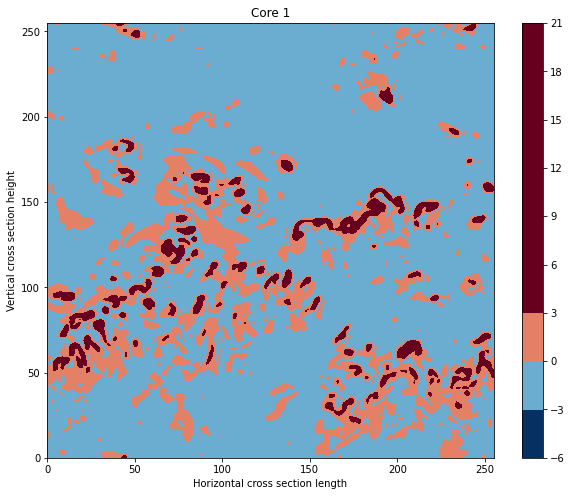

In [ ]:
plt.figure(figsize=(10,8))
                                  # [H,Y,X]
plt.contourf(horiz1, horiz2, cdf1_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
#Creates a 2d plot meshgrid anaylzing the vertical velocity of each 1x1 pixel
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
#Adds labels to each graph
plt.title('Core 1')

Text(0.5, 1.0, 'Core 2')

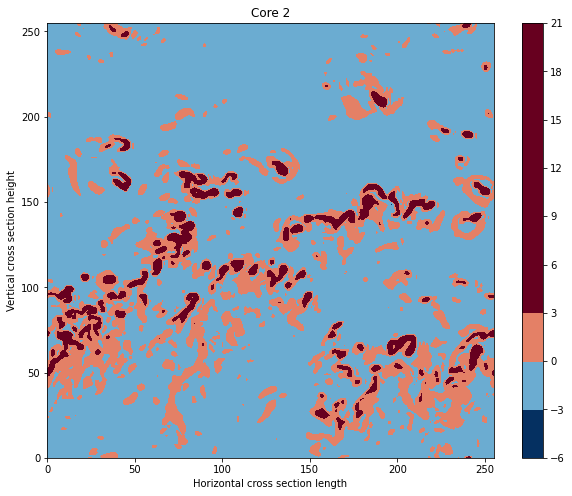

In [ ]:
#Repeats process for cdf2
horiz1_2, horiz2_2 = np.meshgrid(cdf2_x, cdf2_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_2, horiz2_2, cdf2_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 2')

Text(0.5, 1.0, 'Core 3')

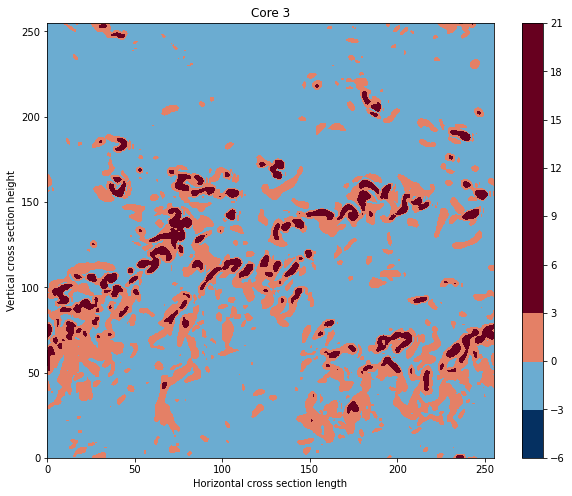

In [ ]:
horiz1_3, horiz2_3 = np.meshgrid(cdf3_x, cdf3_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_3, horiz2_3, cdf3_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 3')

Text(0.5, 1.0, 'Core 4')

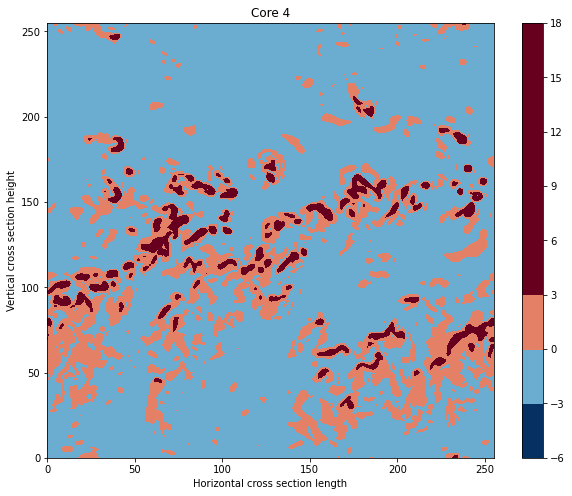

In [ ]:
horiz1_4, horiz2_4 = np.meshgrid(cdf4_x, cdf4_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_4, horiz2_4, cdf4_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 4')

Text(0.5, 1.0, 'Core 5')

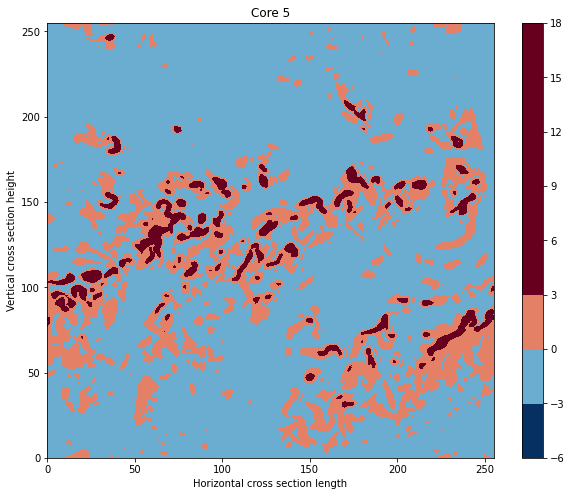

In [ ]:
horiz1_5, horiz2_5 = np.meshgrid(cdf5_x, cdf5_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_5, horiz2_5, cdf5_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 5')

Text(0.5, 1.0, 'Core 6')

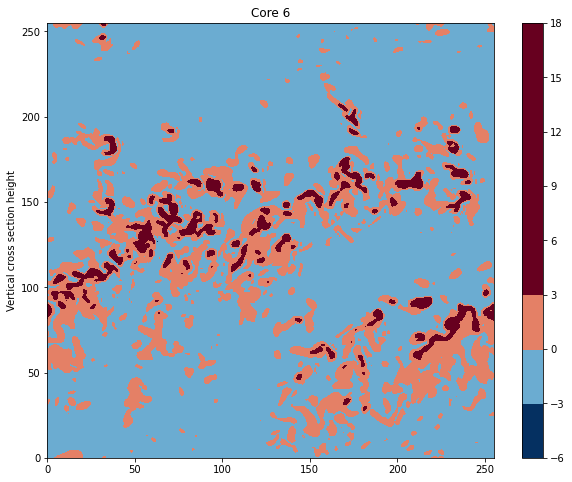

In [ ]:
horiz1_6, horiz2_6 = np.meshgrid(cdf6_x, cdf6_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_6, horiz2_6, cdf6_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.ylabel('Vertical cross section height')
plt.title('Core 6')

Text(0.5, 1.0, 'Core 7')

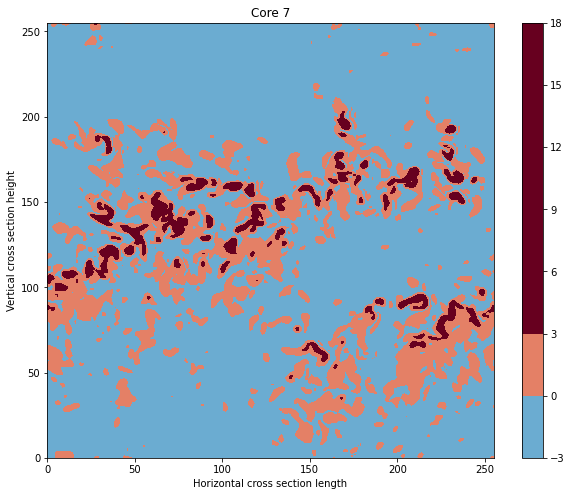

In [ ]:
horiz1_7, horiz2_7 = np.meshgrid(cdf7_x, cdf7_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_7, horiz2_7, cdf7_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 7')

Text(0.5, 1.0, 'Core 8')

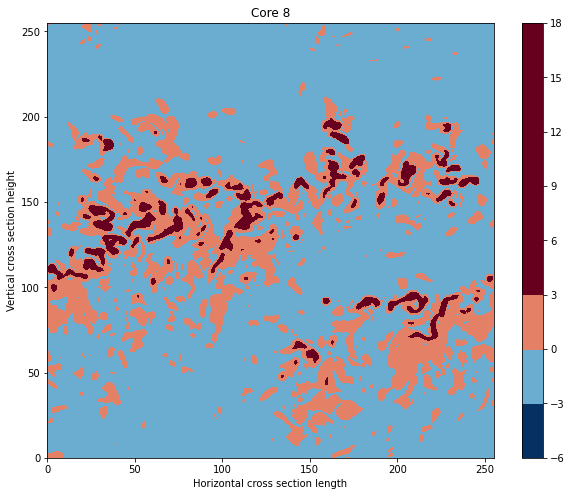

In [ ]:
horiz1_8, horiz2_8 = np.meshgrid(cdf8_x, cdf8_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_8, horiz2_8, cdf8_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 8')

Text(0.5, 1.0, 'Core 9')

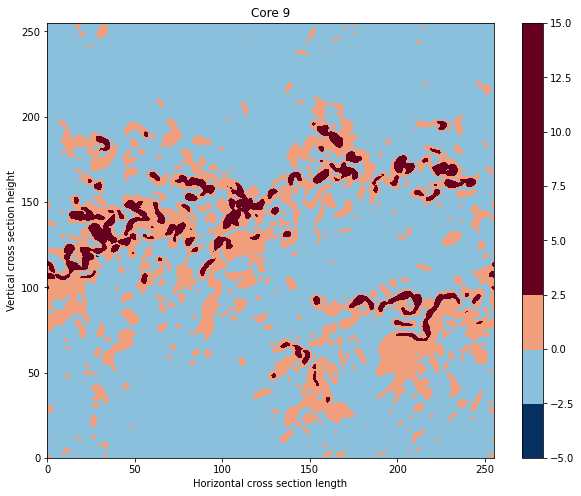

In [ ]:
horiz1_9, horiz2_9 = np.meshgrid(cdf9_x, cdf9_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_9, horiz2_9, cdf9_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 9')

Text(0.5, 1.0, 'Core 10')

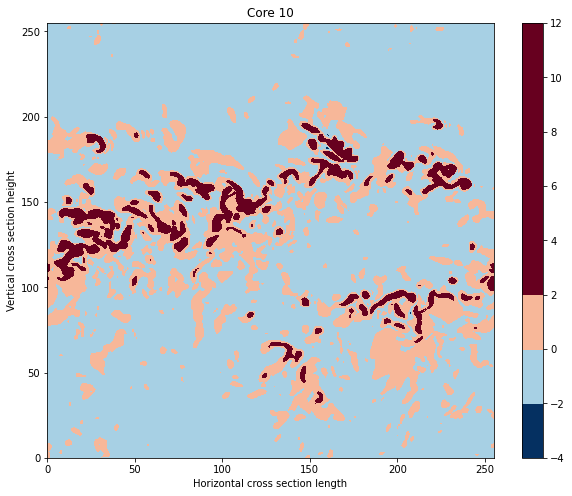

In [ ]:
horiz1_10, horiz2_10 = np.meshgrid(cdf10_x, cdf10_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_10, horiz2_10, cdf10_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 10')

Text(0.5, 1.0, 'Core 11')

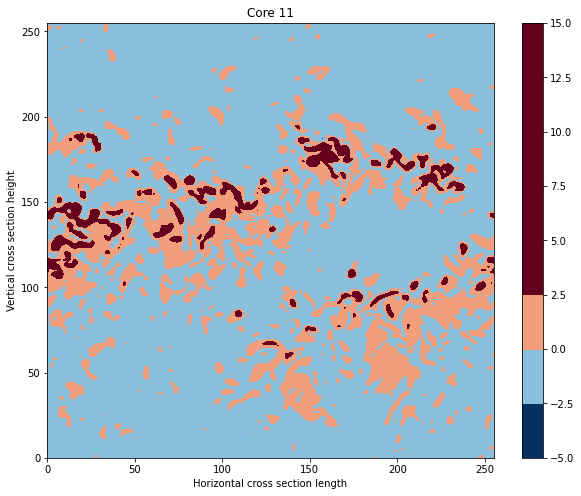

In [ ]:
horiz1_11, horiz2_11 = np.meshgrid(cdf11_x, cdf11_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_11, horiz2_11, cdf11_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical', )
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 11')

Text(0.5, 1.0, 'Core 12')

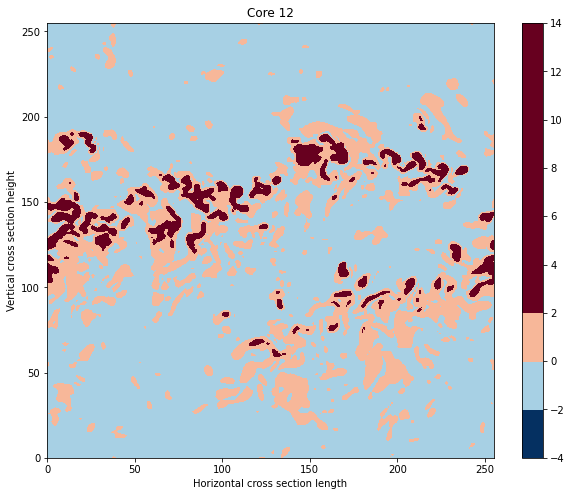

In [ ]:
horiz1_12, horiz2_12 = np.meshgrid(cdf12_x, cdf12_x) #meshgrid for x-y horizontal cross section
plt.figure(figsize=(10,8))
plt.contourf(horiz1_12, horiz2_12, cdf12_w[18,:,:],vmin=-3., vmax=3., cmap='RdBu_r')
plt.colorbar(orientation='vertical')
plt.xlabel('Horizontal cross section length')
plt.ylabel('Vertical cross section height')
plt.title('Core 12')

The 2D graphs allow us to visualize the wind speed at a certain hieght and time in the core. The overall graph is a slice out of the core at 12 specfic times and each pixel represents the wind speed at a particular point of the cluster. We can use these graphs to check our clusters since our visualizations allow us to have a clear picture of average wind speeds in each core. 

##Objective 2: Creating an unsupervised clustering model

In this next objective, we will focus on using unsupervised cluserting to group the data based on vertical wind speed. First, we will convert the vertical velocity data into a numpy array, then isolate it to only include wind speeds of above 3m/s. Next, we will import a K-means algorithm that plots clusters of the wind speed to determine which pixels belong in which core.

###Creating the Feature Vector

By using masked arrays we masked the values where the velocity is less than 3m/s and then used that mask to filter out the corresponding values in the x direction, y direction and z direction (height). After getting these values we compressed the unmasked values into a 1D array and then created a feature vector with the shape: (velcoity,height,y,x).

In [ ]:
#Import vertical velocity,x ,y and height data into a numpy array
vertical_velocity = np.array([cdf1_w, cdf2_w, cdf3_w, cdf4_w, cdf5_w, cdf6_w, 
                              cdf7_w, cdf8_w, cdf9_w, cdf10_w, cdf11_w, cdf12_w])
#X and Y contain same values
xdir = cdf1_x
ydir = cdf1_x
height = cdf1_h

#Making mask for velocity greater than 3m/s
fast_velocity = np.ma.masked_where(vertical_velocity < 3.0, vertical_velocity)
#fvc = fast_velocity.compressed()


#t,z,y,x
#Created 4D arrays out of 1D and reshaping the dimensions
heightArr = np.tile(height[np.newaxis, :, np.newaxis, np.newaxis], (12,1,256,256))
xArr = np.tile(xdir[np.newaxis, np.newaxis, np.newaxis, :], (12,43,256,1))
yArr = np.tile(ydir[np.newaxis, np.newaxis, :, np.newaxis], (12,43,1,256))

In [ ]:
#THIS CODE ADDED BY DR. JONES TO CHECK THE ARRAYS
print(heightArr[1,:,1,1])
print(xArr[1,1,:3,:3])
print(yArr[1,1,:3,:3])

In [ ]:
#making masked arrays
vel_mask = np.ma.getmaskarray(fast_velocity)
height_masked = np.ma.masked_array(heightArr, vel_mask)
x_masked = np.ma.masked_array(xArr, vel_mask)
y_masked = np.ma.masked_array(yArr, vel_mask)

#getting non masked values
height_comp = height_masked.compressed()
x_comp = x_masked.compressed()
y_comp = y_masked.compressed()
vel_comp = fast_velocity.compressed()

#4D feature with [x,y,z,v] for each pixel
featVect = np.column_stack((vel_comp, height_comp, y_comp, x_comp))


###Gausian Mixture Model

###Getting the correct number of clusters (Elbow Method) Future Directions

Using the elbow method we calculated the correct number of clusters to use in the kmeans method. Using a tutorial from here: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [ ]:
#Elbow Method


###SkLearn Kmeans

Using Sklearn Kmeans algorithm we plotted the different clusters using different colors and the centroids of each cluster. Each cluster was plotted on a different graph for readability's sake. Here we set up the kmeans algorithm.

In [ ]:
#SkLean Kmeans
km = KMeans(
    n_clusters=7,
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(featVect)

Here we plotted all of the different clusters on different plots. We plotted the Velocity by Height for the clusters and disregarded the x and y since those values as the same. Using examples from: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

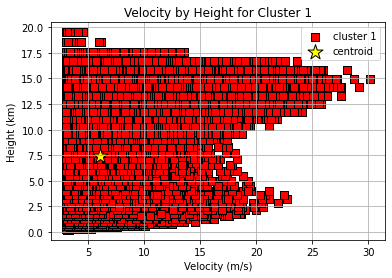

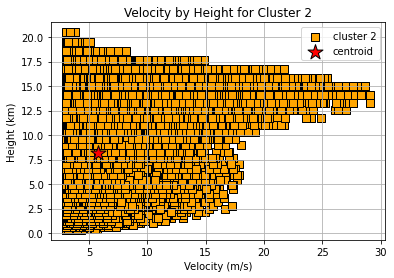

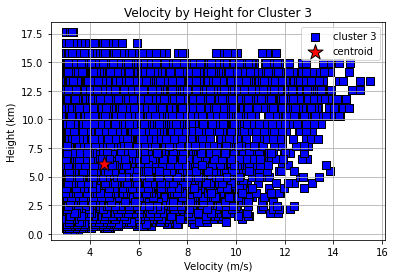

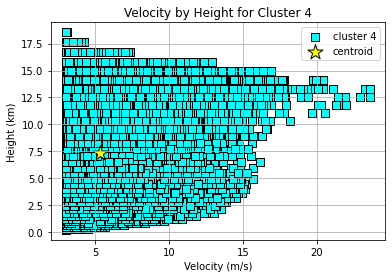

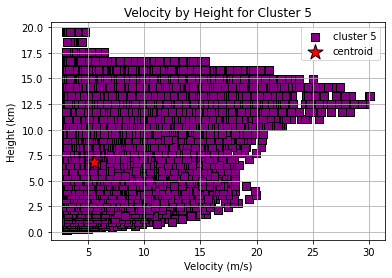

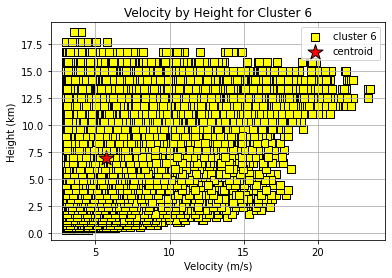

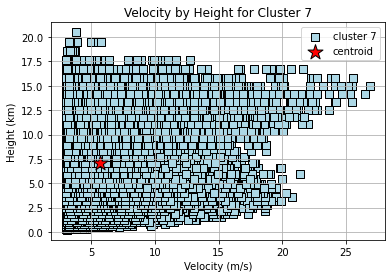

In [ ]:
#Ploting SkLean Kmeans

#Plotting Velocity(X) by Height(Y) for cluster 1
plt.scatter(
  featVect[y_km == 0, 0],featVect[y_km == 0, 1], 
  s=50, c='red',
  marker='s', edgecolor='black',
  label='cluster 1'
  
)
plt.scatter(
    km.cluster_centers_[0, 0], km.cluster_centers_[0, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 1")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#Plotting Velocity(X) by Height(Y) for cluster 2
plt.scatter(
  featVect[y_km == 1, 0], featVect[y_km == 1, 1],
  s=50, c='orange',
  marker='s', edgecolor='black',
  label='cluster 2'
)
plt.scatter(
    km.cluster_centers_[1, 0], km.cluster_centers_[1, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 2")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#Plotting Velocity(X) by Height(Y) for cluster 3
plt.scatter(
  featVect[y_km == 2, 0], featVect[y_km == 2, 1],
  s=50, c='blue',
  marker='s', edgecolor='black',
  label='cluster 3'
)
plt.scatter(
    km.cluster_centers_[2, 0], km.cluster_centers_[2, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 3")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#Plotting Velocity(X) by Height(Y) for cluster 4
plt.scatter(
  featVect[y_km == 3, 0], featVect[y_km == 3, 1],
  s=50, c='cyan',
  marker='s', edgecolor='black',
  label='cluster 4'
)
plt.scatter(
    km.cluster_centers_[3, 0], km.cluster_centers_[3, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 4")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#Plotting Velocity(X) by Height(Y) for cluster 5
plt.scatter(
  featVect[y_km == 4, 0], featVect[y_km == 4, 1],
  s=50, c='purple',
  marker='s', edgecolor='black',
  label='cluster 5'
)
plt.scatter(
    km.cluster_centers_[4, 0], km.cluster_centers_[4, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 5")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#Plotting Velocity(X) by Height(Y) for cluster 6
plt.scatter(
  featVect[y_km == 5, 0], featVect[y_km == 5, 1],
  s=50, c='yellow',
  marker='s', edgecolor='black',
  label='cluster 6'
)
plt.scatter(
    km.cluster_centers_[5, 0], km.cluster_centers_[5, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 6")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#Plotting Velocity(X) by Height(Y) for cluster 7
plt.scatter(
  featVect[y_km == 6, 0], featVect[y_km == 6, 1],
  s=50, c='lightblue',
  marker='s', edgecolor='black',
  label='cluster 7'
)
plt.scatter(
    km.cluster_centers_[6, 0], km.cluster_centers_[6, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroid'
)
plt.title("Velocity by Height for Cluster 7")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (km)")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


###SciPy Kmeans


Using SciPy Kmeans algorithm we plotted the different clusters using different colors and the centroids of each cluster as a white triangle. All dimensions of the feature vector were plotted.

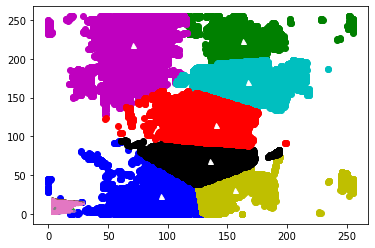

In [ ]:
#SciPy Kmeans
centroids,_ = kmeans(featVect,7)
idx,_ = vq(featVect,centroids)
plot(featVect[idx==0,0],featVect[idx==0,1],featVect[idx==0,2],featVect[idx==0,3],'ob',
     featVect[idx==1,0],featVect[idx==1,1],featVect[idx==1,2],featVect[idx==1,3],'og',
     featVect[idx==2,0],featVect[idx==2,1],featVect[idx==2,2],featVect[idx==2,3],'oy',
     featVect[idx==3,0],featVect[idx==3,1],featVect[idx==3,2],featVect[idx==3,3],'om',
     featVect[idx==4,0],featVect[idx==4,1],featVect[idx==4,2],featVect[idx==4,3],'oc',
     featVect[idx==5,0],featVect[idx==5,1],featVect[idx==5,2],featVect[idx==5,3],'ok',
     featVect[idx==6,0],featVect[idx==6,1],featVect[idx==6,2],featVect[idx==6,3],'or')    
plot(centroids[:,0],centroids[:,1],centroids[:,2],centroids[:,3],'^w',markersize=5)
show()     

#Conclusions
We finished the project by identifing 12 data clusters that help us determine which wind speed pixels belong to different cores. However, we are not able to see which specfic data ia a part of each core. In the future, we would like to create a grid showing exactly where the data from all 12 clusters came from. Another obstacle in the project we were unable to overcome was making each cluster distingusihable from each other, as some clusters included similar wind speeds. This means that there was some slight issues in the clusterings, and there is still more work left to be done. By using the k means clustering alogrithm we were able to sucessfully use the convective cores data to create clusters using the velocity, height, x and y distance. Future projects our team would like to pursue with this data set and/or python methods include using the eblow method to find the correct ammount of clusters to use for the k means algorithm instead of just the number we picked by estimating. Additionally, could as plot the k means in 3d or put it into other clustering algoritms such as the Guasian Mixture Model.

#Bibliography

Giangrande, Scott E., et al. “A Summary of Convective-Core Vertical Velocity Properties Using ARM UHF Wind Profilers in Oklahoma.” AMETSOC, American Meteorological Society, 1 Oct. 2013, journals.ametsoc.org/jamc/article/52/10/2278/13772/A-Summary-of-Convective-Core-Vertical-Velocity. 

II, David John Gagne, et al. “Storm-Based Probabilistic Hail Forecasting with Machine Learning Applied to Convection-Allowing Ensembles.” AMETSOC, American Meteorological Society, 1 Oct. 2017, journals.ametsoc.org/waf/article/32/5/1819/41181. 

Jergensen, G. Eli, Amy McGovern, Ryan Lagerquist, and Travis Smith. " Classifying Convective Storms Using Machine Learning". Weather and Forecasting 35.2 (2020): 537-559. https://doi.org/10.1175/WAF-D-19-0170.1. Web. 7 Dec. 2020.

Kiani, Sohaib. “sohaib730/Gaussian-Mixture-Model.” GitHub, 18 Feb. 2019, github.com/sohaib730/Gaussian-Mixture-Model. 

Stubenrauch, C. J., Caria, G., Protopapadaki, S. E., and Hemmer, F.: 3D Radiative Heating of Tropical Upper Tropospheric Cloud Systems derived from Synergistic A-Train Observations and Machine Learning, Atmos. Chem. Phys. Discuss., https://doi.org/10.5194/acp-2020-613, in review, 2020.